Number of colonies: 11


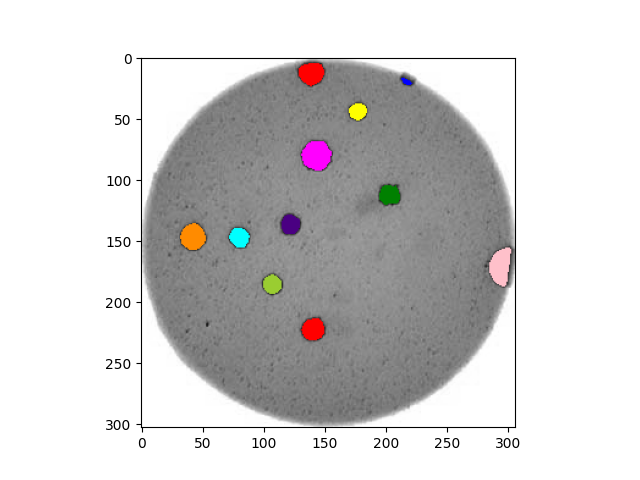

In [53]:
import imageio.v3 as iio
import skimage as ski
import matplotlib.pyplot as plt
import numpy as np

%matplotlib widget

image = iio.imread(uri='data/colonies-01.tif')
gray_image = ski.color.rgb2gray(image)
blurred_image = ski.filters.gaussian(gray_image, sigma=1)

histogram, bin_edges = np.histogram(blurred_image, bins=256, range=(0, 1))
# 0.2 is a good threshold for this image
threshold = 0.2

binary_mask = blurred_image < threshold
labeled_image, count = ski.measure.label(
    binary_mask, return_num=True)
print(f'Number of colonies: {count}')

colored_label_image = ski.color.label2rgb(labeled_image, bg_label=0)

summary_image = ski.color.gray2rgb(gray_image)
summary_image[binary_mask] = colored_label_image[binary_mask]

fig, ax = plt.subplots()
ax.imshow(summary_image, cmap='viridis')

In [ ]:
def count_colonies(uri, sigma=1, threshold=0.2):
    image = iio.imread(uri=uri)
    gray_image = ski.color.rgb2gray(image)
    blurred_image = ski.filters.gaussian(gray_image, sigma=sigma)
    binary_mask = blurred_image < threshold
    labeled_image, count = ski.measure.label(
        binary_mask, return_num=True, connectivity=1)
    return count


In [ ]:
import glob

files = glob.glob('data/colonies-*.tif')
counts = [(uri, count_colonies(uri)) for uri in files]
print(counts)